# Assignment #1 - Linear Regression

<font color="blue"> Nishita Kalyanpur </font>

<font color="blue"> 801076677</font>

$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\tv}{\mathbf{t}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Im}{\mathbf{I}}
$

# Introduction

In this assignment, we explore supervised learning, where learning means training the data. Linear Model can help in understanding and predicting the behavior of complex systems or analyzing the data. Linear regression is a statistical method used to create a linear model.The methods in Linear Model such as Least Squares and Least Mean Squares were implemented.

Firstly, the data is read and understood. Basic visualizations are acheived and then Least Squares and Least Mean Squares are calculated. For this purpose, the data is partitioned into training and testing data. The training samples are fed into the models for learning purposes and from the test data predictions are made. From the visualizations of the target values against the values predicted, it can be known if the predictions are accurate or is very different from the target. To calculate it, we use Least Squares and Least Mean squares. If the model indeed predicts accurate values, the predicted values will overlap or overlay with the target values. If there are any outliers or irregular data in the training set, it would cause a bit of variations in the predicted values.

Linear Model is a dot product of two vectors namely, the weight vector $\wv$ and the input vector $\xv$. It is given as:

$$
\begin{align}
  f(\xv; \wv) &= \wv^\top \xv = \sum_0^D w_i x_i \\
     &= w_0 x_0 + w_1 x_1 + \cdots + w_D x_D
\end{align}
$$

In Linear Regression, the target output $t$ is a real number ($y, t \in \R$) which is a column feature from the dataset. By training $f(\xv; \wv)$ generates $y$ values close to the target outputs.



# Data

The data comes from FBI National Instant Criminal Background Check System:

NICS webpage:   https://www.fbi.gov/services/cjis/nics

Data Repository: https://github.com/BuzzFeedNews/nics-firearm-background-checks/tree/master/data

###### From the official website:

NICS is used by Federal Firearms Licensees (FFLs) to instantly determine whether a prospective buyer is eligible to buy firearms. Before ringing up the sale, cashiers call in a check to the FBI or to other designated agencies to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. More than 230 million such checks have been made, leading to more than 1.3 million denials.

The data covers information about the sales of different types of guns from November 1998 - February 2018 from all the states in USA.

###### Data attributes:
month, state, permit, permit_recheck, handgun, long_gun, other, multiple, admin, prepawn_handgun, prepawn_long_gun, prepawn_other, redemption_handgun, redemption_long_gun, redemption_other, returned_handgun, returned_long_gun, returned_other, rentals_handgun, rentals_long_gun, private_sale_handgun, private_sale_long_gun, private_sale_other, return_to_seller_handgun, return_to_seller_long_gun, return_to_seller_other, totals

In [334]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [335]:
df = pd.read_csv("nics-firearm-background-checks.csv")
df

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2018-11,Alaska,22477.0,17.0,8408.0,10303.0,357.0,1153,0.0,3.0,...,0.0,0.0,0.0,13.0,10.0,0.0,0.0,0.0,0.0,45345
1,2018-11,Alaska,184.0,11.0,2707.0,2827.0,360.0,197,0.0,0.0,...,0.0,0.0,0.0,26.0,39.0,2.0,0.0,0.0,0.0,6645
2,2018-11,Arizona,4537.0,380.0,12412.0,8886.0,1139.0,879,0.0,9.0,...,0.0,0.0,0.0,26.0,24.0,3.0,1.0,0.0,0.0,30385
3,2018-11,Arkansas,2739.0,1163.0,5739.0,10196.0,300.0,914,60.0,9.0,...,0.0,0.0,0.0,11.0,14.0,1.0,1.0,1.0,0.0,24475
4,2018-11,California,33942.0,0.0,36997.0,30913.0,3606.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106380
5,2018-11,Colorado,6330.0,0.0,18926.0,15702.0,1547.0,1238,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44094
6,2018-11,Connecticut,6103.0,376.0,5078.0,2331.0,863.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14751
7,2018-11,Delaware,176.0,0.0,1578.0,2082.0,124.0,73,0.0,0.0,...,0.0,0.0,0.0,55.0,26.0,1.0,1.0,0.0,0.0,4178
8,2018-11,District of Columbia,207.0,0.0,80.0,3.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,290
9,2018-11,Florida,16036.0,0.0,51850.0,23876.0,3502.0,3545,6.0,56.0,...,9.0,0.0,0.0,171.0,119.0,23.0,39.0,53.0,0.0,105975


In [336]:
df.isnull()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [337]:
np.any(df.isnull())

True

In [338]:
df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2018-11,Alaska,22477.0,17.0,8408.0,10303.0,357.0,1153,0.0,3.0,...,0.0,0.0,0.0,13.0,10.0,0.0,0.0,0.0,0.0,45345
1,2018-11,Alaska,184.0,11.0,2707.0,2827.0,360.0,197,0.0,0.0,...,0.0,0.0,0.0,26.0,39.0,2.0,0.0,0.0,0.0,6645
2,2018-11,Arizona,4537.0,380.0,12412.0,8886.0,1139.0,879,0.0,9.0,...,0.0,0.0,0.0,26.0,24.0,3.0,1.0,0.0,0.0,30385
3,2018-11,Arkansas,2739.0,1163.0,5739.0,10196.0,300.0,914,60.0,9.0,...,0.0,0.0,0.0,11.0,14.0,1.0,1.0,1.0,0.0,24475
4,2018-11,California,33942.0,0.0,36997.0,30913.0,3606.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106380


In [339]:
df.shape

(13255, 27)

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13255 entries, 0 to 13254
Data columns (total 27 columns):
month                        13255 non-null object
state                        13255 non-null object
permit                       13231 non-null float64
permit_recheck               1870 non-null float64
handgun                      13235 non-null float64
long_gun                     13236 non-null float64
other                        6270 non-null float64
multiple                     13255 non-null int64
admin                        13232 non-null float64
prepawn_handgun              11312 non-null float64
prepawn_long_gun             11310 non-null float64
prepawn_other                5885 non-null float64
redemption_handgun           11315 non-null float64
redemption_long_gun          11314 non-null float64
redemption_other             5885 non-null float64
returned_handgun             2970 non-null float64
returned_long_gun            2915 non-null float64
returned_other   

In [341]:
df.describe()


,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,13231.000000,1870.000000,13235.000000,13236.000000,6270.000000,13255.000000,13232.000000,11312.000000,11310.000000,5885.000000,...,2585.000000,1760.000000,1595.000000,3520.000000,3520.000000,3520.000000,3245.000000,3520.000000,3025.000000,13255.000000
mean,6944.547729,1981.110160,6188.221005,7816.519946,406.253748,275.643606,56.639586,4.942716,7.669054,0.227867,...,1.163250,0.136364,0.124765,20.357955,16.705966,1.725284,0.598151,0.630114,0.109091,22620.911656
std,26307.152791,16106.066042,8928.087314,9230.552561,1317.089840,777.614386,588.479237,11.051790,16.055155,1.120344,...,4.463956,0.965368,0.825477,86.553594,68.280997,6.489753,2.887213,2.594418,0.416270,35420.511907
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,931.500000,2107.000000,20.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4747.000000
50%,621.000000,0.000000,3202.000000,5138.000000,140.000000,128.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12692.000000
75%,4698.000000,3.000000,7604.500000,10418.750000,405.000000,307.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,7.000000,9.000000,1.000000,0.000000,0.000000,0.000000,26384.000000
max,522188.000000,244550.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,13.000000,12.000000,1017.000000,913.000000,111.000000,70.000000,56.000000,4.000000,541978.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA0457BB00>,
      dtype=object)

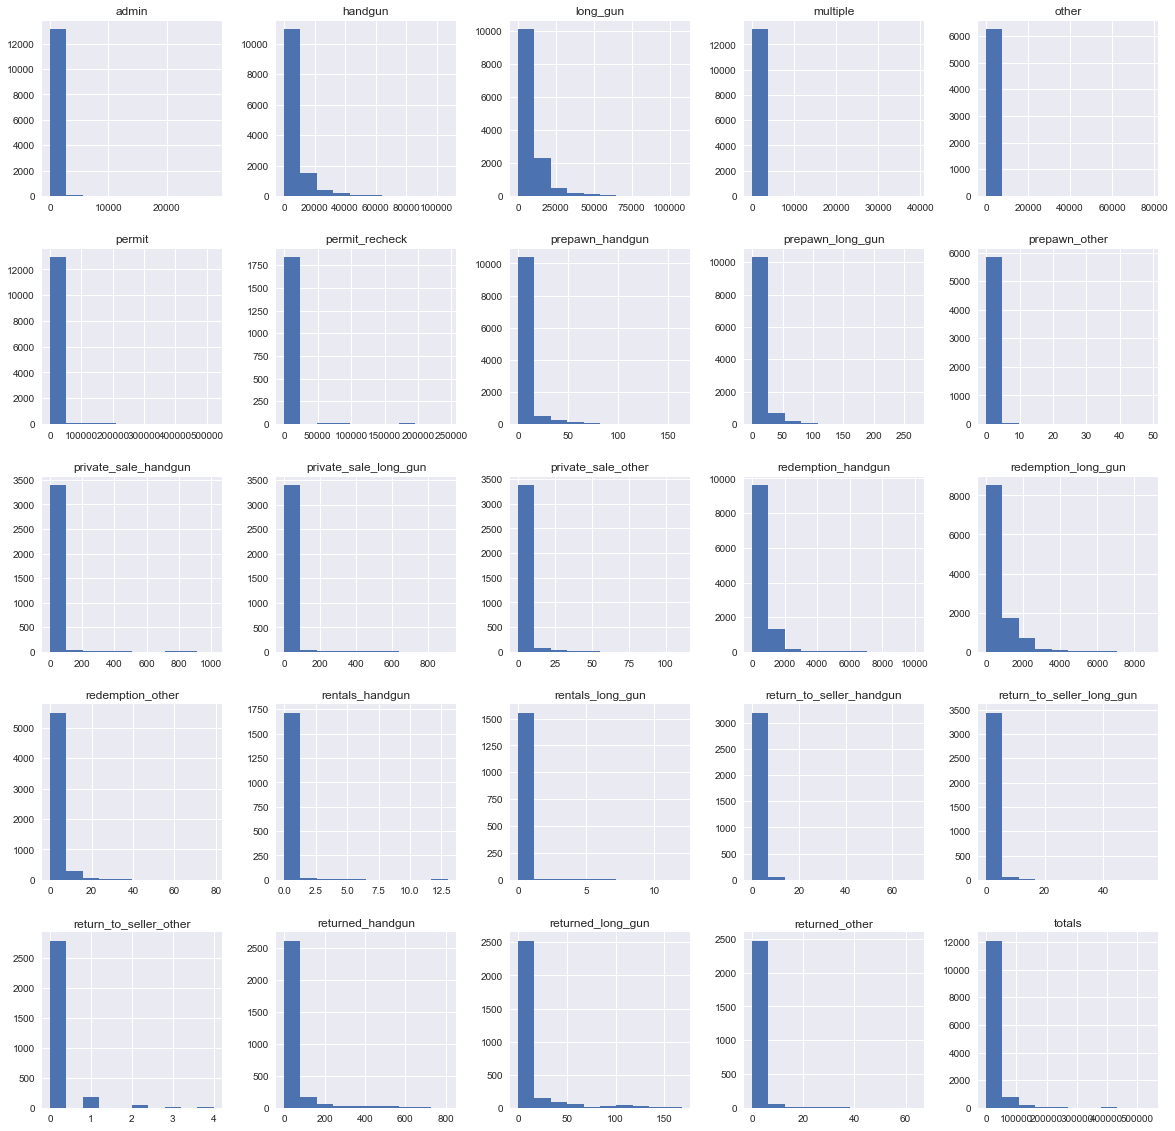

In [342]:
df.hist(figsize=(20,20))

Text(0, 0.5, 'total')

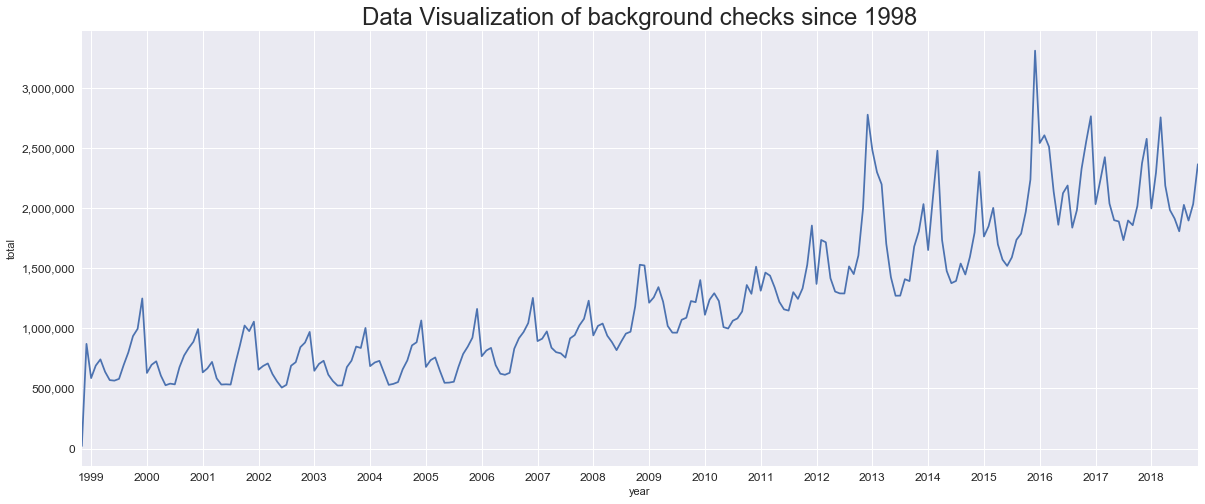

In [343]:
# sum the totals by month
totals = df.groupby("month")["totals"].sum()

tick = pd.np.arange(2, len(totals), 12)
plt.style.use('seaborn')
ax = totals.plot(figsize=(20,8))


ax.set_title("Data Visualization of background checks since 1998", fontsize=24)
ax.set_yticklabels([ "{0:,.0f}".format(y) for y in ax.get_yticks() ], fontsize=12);
plt.setp(ax.get_xticklabels(), rotation=0, fontsize=12)
ax.set_xticks(tick)
ax.set_xticklabels([ totals.index[i].split("-")[0] for i in tick ])
ax.set_xlim(0, len(totals) - 1)
ax.set_xlabel("year")
ax.set_ylabel("total")

This visualization shows an exponential increase in background checks since 1998. Each spike shows that gun sales greatly increased each year. The greatest spike being in 2016.

In [344]:
df.columns.values

array(['month', 'state', 'permit', 'permit_recheck', 'handgun',
       'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun',
       'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
       'redemption_long_gun', 'redemption_other', 'returned_handgun',
       'returned_long_gun', 'returned_other', 'rentals_handgun',
       'rentals_long_gun', 'private_sale_handgun',
       'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'], dtype=object)

In [345]:
df['month'] = df['month'].str.replace('-', '')

In [346]:
df.loc[:, 'month']

0        201811
1        201811
2        201811
3        201811
4        201811
5        201811
6        201811
7        201811
8        201811
9        201811
10       201811
11       201811
12       201811
13       201811
14       201811
15       201811
16       201811
17       201811
18       201811
19       201811
20       201811
21       201811
22       201811
23       201811
24       201811
25       201811
26       201811
27       201811
28       201811
29       201811
          ...  
13225    199811
13226    199811
13227    199811
13228    199811
13229    199811
13230    199811
13231    199811
13232    199811
13233    199811
13234    199811
13235    199811
13236    199811
13237    199811
13238    199811
13239    199811
13240    199811
13241    199811
13242    199811
13243    199811
13244    199811
13245    199811
13246    199811
13247    199811
13248    199811
13249    199811
13250    199811
13251    199811
13252    199811
13253    199811
13254    199811
Name: month, Length: 132

In [347]:
df['month'] = df['month'].astype('float')

# Preprocessing the data

In [348]:
abc ={'Alabama':1, 'Alaska':2, 'Arizona':3, 'Arkansas':4, 'California':5, 'Colorado':6, 'Connecticut':7,
            'Delaware':8, 'District of Columbia':9, 'Florida':10, 'Georgia':11, 'Guam':12, 'Hawaii':13, 'Idaho':14,
            'Illinois':15, 'Indiana':16, 'Iowa':17, 'Kansas':18, 'Kentucky':19, 'Louisiana':20, 'Maine':21,
            'Mariana Islands': 22, 'Maryland':23, 'Massachusetts':24, 'Michigan':25, 'Minnesota':26,
            'Mississippi':27, 'Missouri':28, 'Montana':29, 'Nebraska':30, 'Nevada':31, 'New Hampshire':32,
            'New Jersey':33, 'New Mexico':34, 'New York':35, 'North Carolina':36, 'North Dakota':37, 'Ohio':38,
            'Oklahoma':39, 'Oregon':40, 'Pennsylvania':41, 'Puerto Rico':42, 'Rhode Island':43, 'South Carolina':44,
            'South Dakota':45, 'Tennessee':46, 'Texas':47, 'Utah':48, 'Vermont':49, 'Virgin Islands':50,
            'Virginia':51, 'Washington':52, 'West Virginia': 53, 'Wisconsin':54, 'Wyoming':55 }



def state_conv(s):
    return abc[s]


df['state'] = df['state'].apply(lambda x: state_conv(x))

In [349]:
df

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,201811.0,2,22477.0,17.0,8408.0,10303.0,357.0,1153,0.0,3.0,...,0.0,0.0,0.0,13.0,10.0,0.0,0.0,0.0,0.0,45345
1,201811.0,2,184.0,11.0,2707.0,2827.0,360.0,197,0.0,0.0,...,0.0,0.0,0.0,26.0,39.0,2.0,0.0,0.0,0.0,6645
2,201811.0,3,4537.0,380.0,12412.0,8886.0,1139.0,879,0.0,9.0,...,0.0,0.0,0.0,26.0,24.0,3.0,1.0,0.0,0.0,30385
3,201811.0,4,2739.0,1163.0,5739.0,10196.0,300.0,914,60.0,9.0,...,0.0,0.0,0.0,11.0,14.0,1.0,1.0,1.0,0.0,24475
4,201811.0,5,33942.0,0.0,36997.0,30913.0,3606.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106380
5,201811.0,6,6330.0,0.0,18926.0,15702.0,1547.0,1238,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44094
6,201811.0,7,6103.0,376.0,5078.0,2331.0,863.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14751
7,201811.0,8,176.0,0.0,1578.0,2082.0,124.0,73,0.0,0.0,...,0.0,0.0,0.0,55.0,26.0,1.0,1.0,0.0,0.0,4178
8,201811.0,9,207.0,0.0,80.0,3.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,290
9,201811.0,10,16036.0,0.0,51850.0,23876.0,3502.0,3545,6.0,56.0,...,9.0,0.0,0.0,171.0,119.0,23.0,39.0,53.0,0.0,105975


In [350]:
df = df.fillna(0)

In [351]:
df

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,201811.0,2,22477.0,17.0,8408.0,10303.0,357.0,1153,0.0,3.0,...,0.0,0.0,0.0,13.0,10.0,0.0,0.0,0.0,0.0,45345
1,201811.0,2,184.0,11.0,2707.0,2827.0,360.0,197,0.0,0.0,...,0.0,0.0,0.0,26.0,39.0,2.0,0.0,0.0,0.0,6645
2,201811.0,3,4537.0,380.0,12412.0,8886.0,1139.0,879,0.0,9.0,...,0.0,0.0,0.0,26.0,24.0,3.0,1.0,0.0,0.0,30385
3,201811.0,4,2739.0,1163.0,5739.0,10196.0,300.0,914,60.0,9.0,...,0.0,0.0,0.0,11.0,14.0,1.0,1.0,1.0,0.0,24475
4,201811.0,5,33942.0,0.0,36997.0,30913.0,3606.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106380
5,201811.0,6,6330.0,0.0,18926.0,15702.0,1547.0,1238,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44094
6,201811.0,7,6103.0,376.0,5078.0,2331.0,863.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14751
7,201811.0,8,176.0,0.0,1578.0,2082.0,124.0,73,0.0,0.0,...,0.0,0.0,0.0,55.0,26.0,1.0,1.0,0.0,0.0,4178
8,201811.0,9,207.0,0.0,80.0,3.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,290
9,201811.0,10,16036.0,0.0,51850.0,23876.0,3502.0,3545,6.0,56.0,...,9.0,0.0,0.0,171.0,119.0,23.0,39.0,53.0,0.0,105975


# Visualizing the data

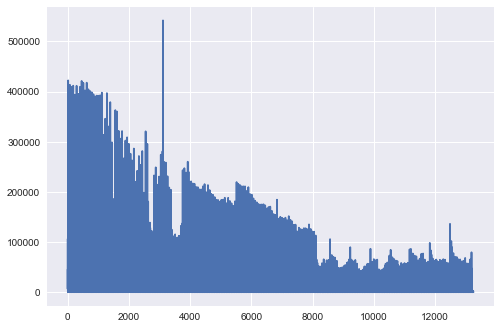

In [352]:
plt.plot(df.loc[:, 'totals'])

The above output displays the column values of 'totals'

In [353]:
df = pd.DataFrame(df)
T = df.loc[:, 'totals'].copy()

In [354]:
T

0         45345
1          6645
2         30385
3         24475
4        106380
5         44094
6         14751
7          4178
8           290
9        105975
10        49784
11          191
12         1188
13        15793
14       296910
15        69171
16        17001
17        17477
18       422343
19        32383
20         7769
21           12
22        13684
23        19392
24        47460
25        48884
26        26230
27        50096
28        10113
29         7306
          ...  
13225       319
13226       784
13227       578
13228       201
13229       186
13230       159
13231        55
13232        77
13233       211
13234       319
13235      1310
13236        58
13237       952
13238       633
13239       344
13240        17
13241         2
13242        38
13243         6
13244        74
13245       107
13246      2794
13247       267
13248        59
13249         0
13250        24
13251       361
13252       408
13253       241
13254       107
Name: totals, Length: 13

In [355]:

X = df.iloc[:, :-1].copy()
X

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other
0,201811.0,2,22477.0,17.0,8408.0,10303.0,357.0,1153,0.0,3.0,...,0.0,0.0,0.0,0.0,13.0,10.0,0.0,0.0,0.0,0.0
1,201811.0,2,184.0,11.0,2707.0,2827.0,360.0,197,0.0,0.0,...,27.0,0.0,0.0,0.0,26.0,39.0,2.0,0.0,0.0,0.0
2,201811.0,3,4537.0,380.0,12412.0,8886.0,1139.0,879,0.0,9.0,...,4.0,0.0,0.0,0.0,26.0,24.0,3.0,1.0,0.0,0.0
3,201811.0,4,2739.0,1163.0,5739.0,10196.0,300.0,914,60.0,9.0,...,0.0,0.0,0.0,0.0,11.0,14.0,1.0,1.0,1.0,0.0
4,201811.0,5,33942.0,0.0,36997.0,30913.0,3606.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,201811.0,6,6330.0,0.0,18926.0,15702.0,1547.0,1238,0.0,0.0,...,70.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,201811.0,7,6103.0,376.0,5078.0,2331.0,863.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,201811.0,8,176.0,0.0,1578.0,2082.0,124.0,73,0.0,0.0,...,0.0,0.0,0.0,0.0,55.0,26.0,1.0,1.0,0.0,0.0
8,201811.0,9,207.0,0.0,80.0,3.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,201811.0,10,16036.0,0.0,51850.0,23876.0,3502.0,3545,6.0,56.0,...,73.0,9.0,0.0,0.0,171.0,119.0,23.0,39.0,53.0,0.0


In [356]:
X['state'] = X['state'].apply(lambda x: df['state'])

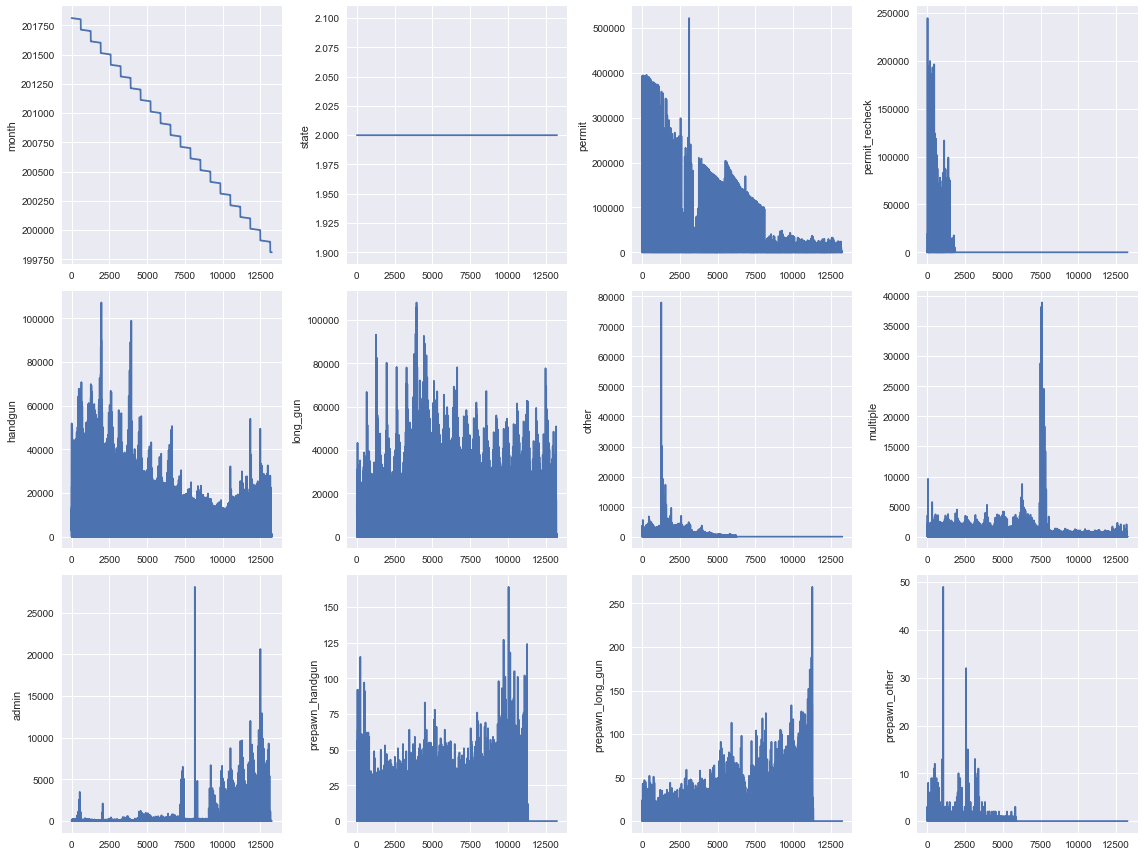

In [357]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.plot(X.iloc[:, i])
    plt.ylabel(X.columns.values[i])
fig.tight_layout()

Represents a group of rows and columns by their integer positions.

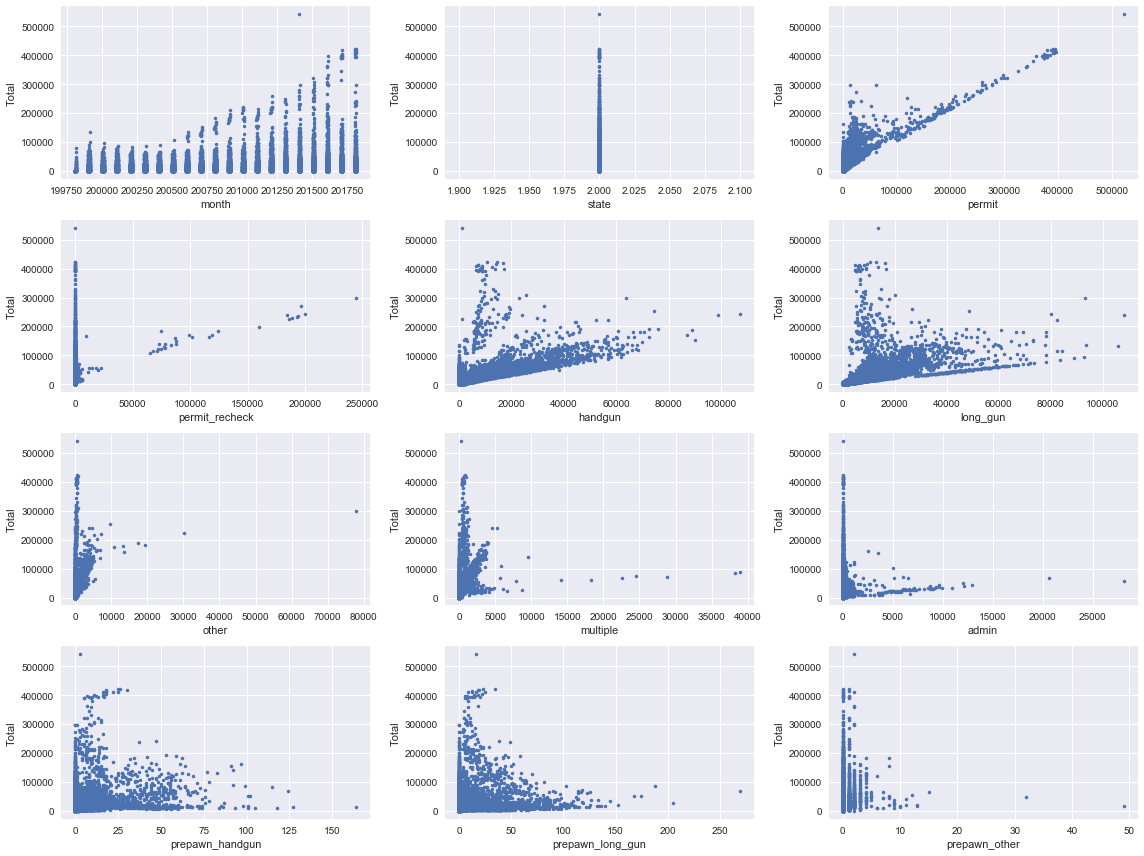

In [403]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.plot(X.iloc[:, i], T, '.')
    plt.xlabel(X.columns.values[i])
    plt.ylabel('Total')
fig.tight_layout()

The column 'totals' is the total number of sales done in a particular month by the given state.

The first plot indicates that guns sold were higher in 2018 i.e latest years as it descends to 1998.
The second plot indicates the guns sold with respect to the states. So accordingly the state which falls before label 20, which is either Kentucky or Louisiana has the maximum growth rate.
Similarly, other plots were taken and it can be observed, the number of sales were made for various guns.

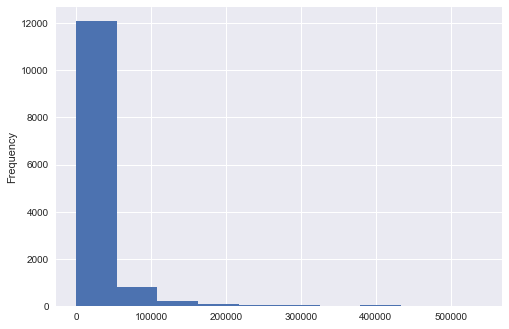

In [359]:
T.plot.hist()

In [360]:
Tlog = T.copy()
Tlog = T.apply(lambda x: np.log(x+1))

In [361]:
pd.concat([T, Tlog], axis=1)

,totals,totals
0,45345,10.722077
1,6645,8.801770
2,30385,10.321737
3,24475,10.105448
4,106380,11.574782
5,44094,10.694102
6,14751,9.599134
7,4178,8.337827
8,290,5.673323
9,105975,11.570968


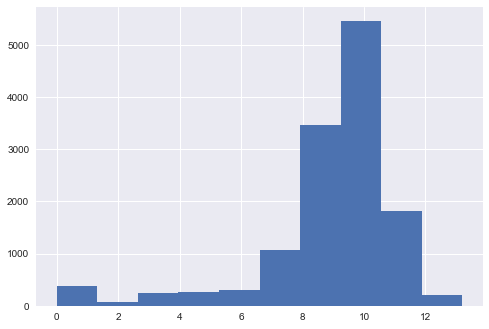

In [362]:
Tlog.hist()

In [363]:
Tlog

0        10.722077
1         8.801770
2        10.321737
3        10.105448
4        11.574782
5        10.694102
6         9.599134
7         8.337827
8         5.673323
9        11.570968
10       10.815469
11        5.257495
12        7.080868
13        9.667385
14       12.601188
15       11.144351
16        9.741086
17        9.768698
18       12.953575
19       10.385420
20        8.958025
21        2.564949
22        9.524056
23        9.872667
24       10.767664
25       10.797226
26       10.174697
27       10.821716
28        9.221676
29        8.896588
           ...    
13225     5.768321
13226     6.665684
13227     6.361302
13228     5.308268
13229     5.231109
13230     5.075174
13231     4.025352
13232     4.356709
13233     5.356586
13234     5.768321
13235     7.178545
13236     4.077537
13237     6.859615
13238     6.452049
13239     5.843544
13240     2.890372
13241     1.098612
13242     3.663562
13243     1.945910
13244     4.317488
13245     4.682131
13246     7.

In [364]:
T

0         45345
1          6645
2         30385
3         24475
4        106380
5         44094
6         14751
7          4178
8           290
9        105975
10        49784
11          191
12         1188
13        15793
14       296910
15        69171
16        17001
17        17477
18       422343
19        32383
20         7769
21           12
22        13684
23        19392
24        47460
25        48884
26        26230
27        50096
28        10113
29         7306
          ...  
13225       319
13226       784
13227       578
13228       201
13229       186
13230       159
13231        55
13232        77
13233       211
13234       319
13235      1310
13236        58
13237       952
13238       633
13239       344
13240        17
13241         2
13242        38
13243         6
13244        74
13245       107
13246      2794
13247       267
13248        59
13249         0
13250        24
13251       361
13252       408
13253       241
13254       107
Name: totals, Length: 13

In [366]:
df1 = df.drop(['other', 'multiple', 'admin','return_to_seller_long_gun','prepawn_other','return_to_seller_other','returned_other','rentals_handgun','rentals_long_gun','return_to_seller_handgun'], axis=1)
df1.describe()

,month,state,permit,permit_recheck,handgun,long_gun,prepawn_handgun,prepawn_long_gun,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,totals
count,13255.000000,13255.000000,13255.00000,13255.00000,13255.000000,13255.000000,13255.000000,13255.000000,13255.000000,13255.000000,13255.000000,13255.000000,13255.000000,13255.000000,13255.000000,13255.000000,13255.000000
mean,200843.863071,28.000075,6931.97367,279.49272,6178.883817,7805.315579,4.218182,6.543719,361.239683,506.400302,0.905168,8.541682,2.041720,5.406262,4.436439,0.458167,22620.911656
std,579.889668,15.874981,26284.98206,6087.31650,8924.581729,9228.673775,10.358225,15.076652,764.482760,893.976815,3.445011,48.870505,11.778762,45.495871,35.948553,3.429698,35420.511907
min,199811.000000,1.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,200311.000000,14.000000,0.00000,0.00000,927.000000,2098.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4747.000000
50%,200811.000000,28.000000,616.00000,0.00000,3191.000000,5129.000000,0.000000,0.000000,3.000000,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12692.000000
75%,201311.000000,42.000000,4687.00000,0.00000,7582.500000,10414.000000,4.000000,6.000000,443.000000,676.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26384.000000
max,201811.000000,55.000000,522188.00000,244550.00000,107224.000000,108058.000000,164.000000,269.000000,10046.000000,8831.000000,79.000000,810.000000,168.000000,1017.000000,913.000000,111.000000,541978.000000


#  Further Preprocessing..

In [368]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
df = scaler.transform(df)


C:\Users\nishi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [369]:
T1 = df[:, 16]
T1

array([0.        , 0.16071429, 0.02380952, ..., 0.        , 0.        ,
       0.        ])

In [370]:
X1 = df[:, :-1]
X1

array([[1.00000000e+00, 1.85185185e-02, 4.30438846e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.85185185e-02, 3.52363517e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.70370370e-02, 8.68844171e-03, ...,
        1.42857143e-02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 9.62962963e-01, 5.74505734e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.81481481e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 1.53201529e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [374]:
Tlog1 = np.log(T+1)
Tlog1

0        10.722077
1         8.801770
2        10.321737
3        10.105448
4        11.574782
5        10.694102
6         9.599134
7         8.337827
8         5.673323
9        11.570968
10       10.815469
11        5.257495
12        7.080868
13        9.667385
14       12.601188
15       11.144351
16        9.741086
17        9.768698
18       12.953575
19       10.385420
20        8.958025
21        2.564949
22        9.524056
23        9.872667
24       10.767664
25       10.797226
26       10.174697
27       10.821716
28        9.221676
29        8.896588
           ...    
13225     5.768321
13226     6.665684
13227     6.361302
13228     5.308268
13229     5.231109
13230     5.075174
13231     4.025352
13232     4.356709
13233     5.356586
13234     5.768321
13235     7.178545
13236     4.077537
13237     6.859615
13238     6.452049
13239     5.843544
13240     2.890372
13241     1.098612
13242     3.663562
13243     1.945910
13244     4.317488
13245     4.682131
13246     7.

# Preliminary Observation

Firstly, the data was preprocessed, by removing all the special characters and the alphabets were labeled in a numerical form. Then the visualizations were done. From this, a bigger picture of the gun sale activity and trends between each state all over America are seen.

From the visualizations, the growth rate of the sales of guns from different states were observed. By this analysis, the basic idea of the gun sale activity is captured. There was a steady growth of gun sales since 1998. Also it can be seen from the previous graph that the state with the label '18' which is Kentucky, shows to have maximum gun sales activity.

One of the visualizations was done with state against other features. It shows which type of gun was sold majorly and in which state. Compared to the types of long guns, the handguns were sold colossally. 

For the graph for each year plotted against the total sales, there's an exponential rise in the vending of guns. From the spikes, it can be seen that in the year 2016, the guns were sold massively as it gradually decreases as the years passes by.


# Method

# Least Squares

Least squares is a statistical method used to determine a line of best fit by minimizing the sum of squares created by a mathematical function.

The error funciton is quadratic, hence the problem can be analytically solved by simply setting derivative with respect to $\wv$ to zero. 

The target values are collected in matrix $\tv$, and the input samples are in matrix $\Xm$.

$$
\begin{align}
\tv &= [t_1, t_2, \cdots, t_N]^\top \\ 
\\
\wv &= [w_0, w_1, \cdots, w_D]^\top \\
\\
\Xm &= \begin{bmatrix}
    x_{10} & x_{11} & x_{12} & \dots  & x_{1D} \\
    x_{20} & x_{21} & x_{22} & \dots  & x_{2D} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{N0} & x_{N1} & x_{N2} & \dots  & x_{ND}
\end{bmatrix}
\end{align}
$$
where the first column is one's, $\xv_{*0} = [1, 1, \dots, 1]^\top$.

With this matrix, $f(\xv; \wv)$ can be written in matrix form as:
$$
f(\xv; \wv) = \Xm \wv.
$$
Thus, the error function can be
$$
\begin{align}
E(\wv) &=  \wv^\top \Xm^\top \Xm \wv - 2 \tv^\top \Xm \wv + \tv^\top \tv 
\end{align}
$$
because $\tv^\top \Xm \wv$ is a scalar, so symmetric. 

After doing the derivative,
$$
\begin{align}
\frac{\partial E(\wv)}{\partial \wv} &=  2 \Xm^\top \Xm \wv - 2 \Xm^\top \tv 
\end{align}
$$

Setting this to zero, 
$$
\begin{align}
 2 \Xm^\top \Xm \wv - 2 \Xm^\top \tv  &= 0\\
\\
\Xm^\top \Xm \wv &= \Xm^\top \tv\\
\\
\wv &= \big(\Xm^\top \Xm\big)^{-1} \Xm^\top \tv
\end{align}
$$


### Implementation

For Least Squares, the data is partitioned into training and testing samples. In the LinearRegress class there are two functions called as train and use. In train, the input X is converted into matrix after the column containing ones is added to it. Then the weights are calculated. For the weights calculation, the below mentioned formula is used:

\begin{align}
\wv &= \big(\Xm^\top \Xm\big)^{-1} \Xm^\top \tv
\end{align}

In the use function, the $\yv$ is calculated which predicts the values close to the target outputs. The formula used in this is,

$$
\begin{align}
\yv &=  \Xm \wv
\end{align}
$$

Then the respective train and use functions are called and the target output and the predicted value were plotted against each other. From the plots it'll bbe seen that the predicted values are overlapping with the target outputs or are very close to it. Which means that the prediction is working well.


# Least Mean Squares

Least Squares are computationally costly for bigger datasets as the entire data needs to be iterated if the model needs to learn again. This is not the case with the online learning or sequential learning methods. Here, the batches of data are taken and sampled. This sampled data is fed into the model for training and this process goes on until there is nothing more to learn. One advantage is that if the new data needs to be trained then only the new data is fed in the model. There is no need for the entire dataset to be trained again. As the model is trained, the weights keeps on getting updated. Based on the updated weights, new estimations are made and the step repeats.

The least mean square (LMS) algorithm is a type of filter used in machine learning that uses stochastic gradient descent in sophisticated ways. It is also called as a adaptive filter.

The formula for the weight update is given as,

$$
\wv^{(k+1)} = \wv^{(k)} - \alpha \Big( {\wv^{(k)}}^\top \xv_k - t_k \Big) \xv_k.
$$

Where $\wv$ is the weight, $k$ represents the steps for the repetition and $\alpha$ is a learning rate.


## Implementation

For the Least Mean Squares, there is a class called LMS and inside it there are train, train_step and use functions. Here, the train function is used to take the input values which are the training samples and then add ones to its column and convert  them into a matrix. After the conversion, the train_step is called in an iterative manner. The train_step calculates the weights. Initially the weights are assigned to zero, and then they are updated based on the formula,

$$
\wv^{(k+1)} = \wv^{(k)} - \alpha \Big( {\wv^{(k)}}^\top \xv_k - t_k \Big) \xv_k.
$$

In the use function, the conditions are checked for the weights to have some value atleast. Then the $\yv$ is calculated which predicts the value closer to the target outputs.
To plot this, the predicted values and the target values are iterated and also the Root Mean Squared Error (RMSE) is calculated. It is the standard deviation of the predicted errors. It shows how far the the predicted value is from the data points. Then the Preliminary test is run to see if all the tests are passed or not.

### Super Classs Definition

In [375]:
X.shape

(13255, 26)

In [376]:
Tlog.shape

(13255,)

In [377]:
f = np.hstack((np.ones((X.shape[0], 1)), X))
f[1].shape

(27,)

In [378]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

In [379]:
def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts


In [380]:
Xlst, Tlst = partition(pd.DataFrame(X), pd.DataFrame(Tlog))

In [381]:
Xlst[0].shape

(10604, 26)

In [382]:
Xlst[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 10604 to 13254
Data columns (total 26 columns):
month                        2651 non-null float64
state                        2651 non-null int64
permit                       2651 non-null float64
permit_recheck               2651 non-null float64
handgun                      2651 non-null float64
long_gun                     2651 non-null float64
other                        2651 non-null float64
multiple                     2651 non-null int64
admin                        2651 non-null float64
prepawn_handgun              2651 non-null float64
prepawn_long_gun             2651 non-null float64
prepawn_other                2651 non-null float64
redemption_handgun           2651 non-null float64
redemption_long_gun          2651 non-null float64
redemption_other             2651 non-null float64
returned_handgun             2651 non-null float64
returned_long_gun            2651 non-null float64
returned_other           

In [383]:
Tlst[0].shape

(10604, 1)

In [384]:
Xtrain, Xtest = [xx.as_matrix() for xx in Xlst]
Ttrain, Ttest = [tt.as_matrix() for tt in Tlst]
 

C:\Users\nishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\nishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [385]:
Xlst1, Tlst1 = partition(pd.DataFrame(X1), pd.DataFrame(Tlog1))

In [386]:
Xtrain1, Xtest1 = [xx.as_matrix() for xx in Xlst1]
Ttrain1, Ttest1 = [tt.as_matrix() for tt in Tlst1]  

C:\Users\nishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\nishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


### Least Squares

In [387]:
Xtrain.shape

(10604, 26)

In [388]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X = self.add_ones(X)
        self.w = (np.linalg.inv(X.T @ X))@ X.T @ T
        return self.w
#         pass  ## TODO: replace this with your codes
    
    # apply the learned model to data X
    def use(self, X):
        X = self.add_ones(X)         
        y = X @ self.w
        return y

#         pass  ## TODO: replace this with your codes

In [389]:
Ttest

array([[ 8.49474306],
       [10.16842543],
       [11.14997372],
       ...,
       [ 6.01371516],
       [ 5.48893773],
       [ 4.68213123]])

# Experiments

## Description

Firstly, the data is partitioned into train and test samples. The train samples is fed to the model by calling the train function from the class LinearRegress. The weight is calculated as seen above. Then the use function is called from the same class by passing the test samples. It returns the predicted values. The log is taken of the predicted values and is plotted against the log of the target test values.

## Visualization of the results

C:\Users\nishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


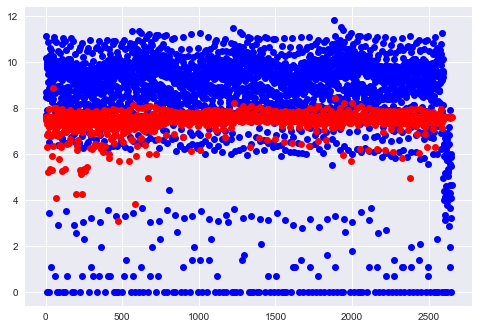

In [390]:
lr = LinearRegress()
W = lr.train(Xtrain,Ttrain)
Y = lr.use((Xtest))
Ylog = np.log(pd.DataFrame(Y))
plt.plot(Ttest,'ob')
plt.plot(Ylog,'or')

In [392]:
Xtrain.shape

(10604, 26)

In [393]:
X.shape

(13255, 26)

### Least Mean Squares

In [394]:
import IPython.display as ipd  # for display and clear_output


alpha = 0.001 

In [396]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):


    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
        

    
        
    # batch training by using train_step function
    def train(self, X, T):
        for i in range(X.shape[0]):            
            self.train_step(X[i],T[i])
        return self.w

            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        if len(x.T.shape) != 2:
            x = np.insert(x,0,1).reshape(-1,1)


        if self.w is None:
            self.w = np.zeros((x.shape[0], 1))

        g = self.w.T @ x
        g = g - t

        n = g * x
        self.w -= (self.alpha * n)
        
        return self.w
        
    
    # apply the current model to data X
    def use(self, X):
        if len(X.T.shape) != 2:
            X = np.insert(x,0,1).reshape(-1,1)
        X = self.add_ones(X)

        y_lms = X @ self.w
        return y_lms
        

## Description

The data is partitioned into train and test samples. The train samples is fed to the model by calling the train function from the class LMS where the ones are added to the column and then converted into a matrix. The train_step function is called in an iterative manner. In the train_step the train samples are taken in batches and the weights are calculated and updated each times it is calculated. Then the use function is called from the same class by passing the test samples. It returns the predicted values. The estimated and the target values are plotted against each other and is next to the RMSE plot which gives the deviation of the predicted values from the data points.

In [397]:
lms = LMS(alpha)
W_lms1 = lms.train(Xtrain1, Ttrain1)
Y_lms1 = lms.use(Xtest1)

## Visualization of the results

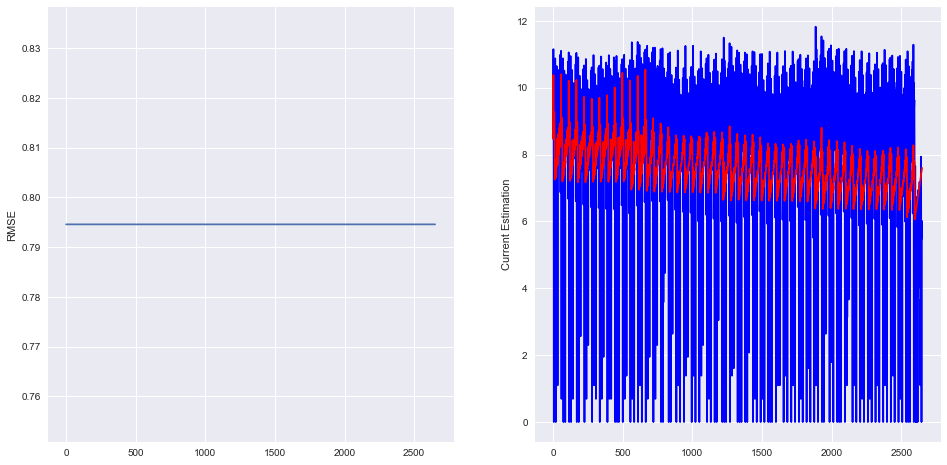

In [398]:
        
fig2 = plt.figure(figsize=(16,8))
errs = []
for i in range(Xtest1.shape[0]):
    errs.append( np.sqrt(np.mean(Ttest1 - Y_lms1)**2) )
    plt.clf()
    plt.subplot(1,2, 1)
    plt.plot(errs)
    plt.ylabel("RMSE")

    plt.subplot(1,2, 2)
    plt.plot(Ttest1[:i],'b')
    plt.plot(Y_lms1[:i],'r')
    plt.ylabel("Current Estimation")


    ipd.clear_output(wait=True)
    ipd.display(fig2)
ipd.clear_output(wait=True)

# Conclusions

The purpose of this assignment is to learn about linear models and its methods. Using supervised learning, the linear model methods can be calculated and visualized as the linear model is the dot product of weight vectors and the x input vectors.

### Challenges 

The data wasn't preprocessed well before. It had many null values. By doing Minmax scaling the graphs of least mean sqaures were comparitively better.

In the least squares, doing the log of the predicted values gave better results as the target values were also in log.

In the Least mean squares, during the matrix multiplications, the shapes were noticed and matrices were multiplied carefully to avoid any alignment issues.

Conditions to check the type of weights were written to avoid the nonetype issues.



# Comparison of algorithm

The Least Square algorithm finds the best fit by using all the available training data. Whereas in Least Mean Squares, the data points are introduced one by one in a sequential manner and sent to the model for learning purposes. This is often called as sequential or online learning.

In Least Squares, as it takes the entire data for training purposes, it is computationally costly, especially for larger datasets. As it will need to train the entire dataset again if any changes or additions were made to the dataset. This is not the case with the LMS. As LMS takes data points in a sequential manner, if any updates are made, then only those updates will be trained and not the entire data.

In the Least Squares, the weights are assigned once and for all and is updates once the training takes place again. In LMS, the weights keep on updating when the data points are brought in sequentially and are being trained in that order.

In this assignment, no learning rate was used for least squares whereas, the learning rate was assigned to the LMS. This process of upadating  the weights continuously with the help of the learning rate is called as Stochastic Gradient Descent.

Least squares refers to the form of regression to control (minimize) the square of the deviations between the predicted and target values. Least mean square also does that same but in a sophisticated manner, which is by using the adaptive filter.

# Preliminary Test

In [324]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


# References

[1] Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn and TensorFlow. O'Reilly Media, 13 Mar. 2017,  shop.oreilly.com/product/0636920052289.do.

[2] Goodfellow, Ian, et al. "Deep Learning - Linear Algebra." Deep Learning, MIT Press, 2016,  www.deeplearningbook.org/contents/linear_algebra.html.

[3] Goodfellow, Ian, et al. “Deep Learning - Probability Theory.” Deep Learning, MIT Press, 2016,  www.deeplearningbook.org/contents/prob.html.

[4] Ieong, Samuel. Probability Theory Review for Machine Learning. Dec. 2006.

[5] “National Instant Criminal Background Check System (NICS).” FBI, FBI, 3 May 2016, www.fbi.gov/services/cjis/nics.

[6] BuzzFeedNews. “BuzzFeedNews/Nics-Firearm-Background-Checks.” GitHub,  github.com/BuzzFeedNews/nics-firearm-background-checks/tree/master/data.
